# Part 1

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

### Step 1

Using ```requests```, I am able to get the html of the SpaceWeatherLive site. From there, I use BeautifulSoup to find the "Top 50 Solar Flares" table, and create a Pandas ```DataFrame``` using its content.

In [3]:
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares")
root = BeautifulSoup(r.content, "html5lib")
table = root.find("table", {"class" : "table table-striped"})
df = pd.read_html(table.prettify(), flavor="html5lib")[0]
flares = pd.DataFrame(df)
flares.columns = ["rank", "x_classification", "date", "region", "start_time", "maximum_time", "end_time", "movie"]
flares.head()

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive


### Step 2

First, I drop the ```movie``` column, as I will not be needing this.

In [4]:
flares = flares.drop('movie', 1)
flares.head()

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


I then combine the date and time of ```start_time```, ```maximum_time```, and ```end_time```. After, I change the column names accordingly and drop the now redundant ```date``` column.

In [5]:
for index, row in flares.iterrows():
    datestr = row["date"]
    startTime = row["start_time"]
    maxTime = row["maximum_time"]
    endTime = row["end_time"]
    flares.set_value(index, "start_time", pd.to_datetime(datestr + " " + startTime))
    flares.set_value(index, "maximum_time", pd.to_datetime(datestr + " " + maxTime))
    flares.set_value(index, "end_time", pd.to_datetime(datestr + " " + endTime))
del flares["date"]
flares=flares.rename(columns = {'start_time':'start_datetime', 'maximum_time':'max_datetime', 'end_time':'end_datetime'})
flares.head()

,rank,x_classification,region,start_datetime,max_datetime,end_datetime
0,1,X28.0,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


__Note__: there were no missing values in the table, hence I did not need to use ```flares.replace```

Here is the final tidied table for the SpaceWeatherLive Top 50 Solar Flare data:

In [6]:
flares

,rank,x_classification,region,start_datetime,max_datetime,end_datetime
0,1,X28.0,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10.0,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9.0,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


### Step 3

In [7]:
import re

Next, I need to scrape the data from the NASA CME list website. There is no html table on this site, so I need to use regular expressions and string spltting to help parse the data accordingly. I store the parsed data in a new Pandas ```DataFrame```.

In [8]:
r = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
root = BeautifulSoup(r.content, "html5lib")
pretext = root.find("pre")
prettytext = pretext.text
lines = prettytext.split("\n")
nasa = pd.DataFrame(columns = ["start_date", "start_time", "end_date", "end_time", "start_frequency", "end_frequency", "flare_location", "flare_region", "flare_classification", "cme_date", "cme_time", "cme_angle", "cme_width", "cme_speed"])
for line in lines[11:-3]:
    rowattrs = re.findall(r"([\w/\.\?>:-]+)", line)
    data = pd.Series(rowattrs[:14], index=nasa.columns)
    nasa = nasa.append(data, ignore_index=True)
nasa.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712


### Step 4

In this part, I am tidying up the data scraped from the NASA CME list website.

I first need to find and recode any missing entries as ```NaN```.

In [9]:
nasa = nasa.replace({"start_frequency": {"????": np.nan},\
                 "end_frequency": {"????": np.nan},\
                 "flare_location": {"Back": np.nan, "BACK": np.nan, "Back?": np.nan, "------": np.nan},\
                 "flare_region": {"-----": np.nan, "altr": np.nan, "DSF": np.nan, "EP": np.nan, "FILA": np.nan, "DIM": np.nan, "EP?": np.nan},\
                 "flare_classification": {"----": np.nan, "FILA": np.nan},\
                 "cme_date": {"--/--": np.nan},\
                 "cme_time": {"--:--": np.nan},\
                 "cme_angle": {"----": np.nan},\
                 "cme_width": {"----": np.nan, "---": np.nan},\
                 "cme_speed": {"----": np.nan},\
                })
nasa[85:92]


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
85,2000/08/11,11:35,08/11,11:59,2800,2000,NW90b,NaN,NaN,08/11,07:31,273,70,1071
86,2000/09/12,12:00,09/13,12:20,14000,60,S19W06,NaN,M1.0,09/12,11:54,Halo,360,1550
87,2000/09/12,18:15,09/12,19:00,2000,1000,NE90b,NaN,NaN,09/12,17:30,Halo,360,1053
88,2000/09/16,04:30,09/16,10:30,14000,400,N14W07,9165,M5.9,09/16,05:18,Halo,360,1215
89,2000/09/19,08:45,09/19,10:20,12000,1500,N14W46,9165,M5.1,09/19,08:50,283,76,766
90,2000/09/25,02:20,09/25,03:00,14000,1000,N09W18,9169,M1.8,09/25,02:50,Halo,360,587
91,2000/10/05,22:10,10/05,22:35,5000,1250,N25W90,9177,NaN,10/05,18:26,323,86,1046


Once all of the missing entries are encoded as ```NaN```, I need to look at which CMEs are Halo Flares. If the flare is a Halo (encoded as "Halo" in the ```cme_angle``` column), I mark the newly added ```is_halo``` column as ```True```, else I mark it as ```False```. If the data was marked as ```NaN```, I count it as "NA".

In [10]:
isHalo = []
for index, row in nasa.iterrows():
    if row["cme_angle"] == "Halo":
        isHalo.append(True)
    elif pd.isnull(row["cme_angle"]):
        isHalo.append("NA")
    else:
        isHalo.append(False)
isHaloSeries = pd.Series(isHalo)
nasa = nasa.assign(is_halo=isHaloSeries.values)
nasa = nasa.replace({"cme_angle": {"Halo": "NA"}})
nasa.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False


Next, the ```cme_width``` column indicates it is a lower bound for some flares (encoded as >[some number]). Using regular expressions, if the current flare's width is a lower bound, I mark the newly added ```width_lower_bound``` column as ```True``` for the current flare, and ```False``` if it is not. If the data was marked as ```NaN```, I count it as "NA".

In [11]:
isLowerBound = []
regex = re.compile(">([\d]+)")
for index, row in nasa.iterrows():
    if pd.isnull(row["cme_width"]):
        isLowerBound.append("NA")
        continue
    m = regex.match(row["cme_width"])
    if m:
        isLowerBound.append(True)
        nasa.set_value(index, "cme_width", m.group(1))
    else:
        isLowerBound.append(False)
isLowerBoundSeries = pd.Series(isLowerBound)
nasa = nasa.assign(width_lower_bound=isLowerBoundSeries.values)
nasa[78:85]

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
78,2000/06/23,14:40,06/22,15:05,14000,2000,N26W72,9042,M3.0,06/23,14:54,282,198,847,False,True
79,2000/06/25,08:10,06/25,09:00,12000,2500,N16W55,9046,M1.9,06/25,07:54,262,165,1617,False,False
80,2000/07/10,22:00,07/10,23:30,14000,1000,N18E49,9077,M5.7,07/10,21:50,67,289,1352,False,True
81,2000/07/11,13:00,07/11,13:30,12000,1000,N18E27,9077,X1.0,07/11,13:27,NA,360,1078,True,False
82,2000/07/12,20:05,07/12,20:35,6000,1000,N19W61,9070,M1.5,07/12,20:30,281,101,820,False,False
83,2000/07/14,10:30,07/15,14:30,14000,80,N22W07,9077,X5.7,07/14,10:54,NA,360,1674,True,False
84,2000/07/22,11:45,07/22,12:45,14000,2000,N14W56,9085,M3.7,07/22,11:54,259,229,1230,False,True


Similar to the SpaceWeatherLive ```DataFrame``` above, I combine the date and time columns for the start, end, and cme time for each flare. If the time happened to be 24:00, I corrected this by changing the time to 00:00 and adding a day.

After combining the date and time for start, end, and cme, I rename the columns accordingly and drop the unnecessary columns.

In [12]:
for index, row in nasa.iterrows():
    startDate = row["start_date"]
    startTime = row["start_time"]
    startDateTime = pd.to_datetime(startDate + " " + startTime)
    nasa.set_value(index, "start_date", startDateTime)

    endDate = row["end_date"]
    endTime = row["end_time"]
    if (endTime == "24:00"):
        endTime = "00:00"
        endDT = pd.to_datetime(str(startDateTime.year) + "/" + endDate + " " + endTime) + timedelta(days=1)
        nasa.set_value(index, "end_date", endDT)
    else:
        nasa.set_value(index, "end_date", pd.to_datetime(str(startDateTime.year) + "/" + endDate + " " + endTime))

    cmeDate = row["cme_date"]
    cmeTime = row["cme_time"]
    nasa.set_value(index, "cme_date", pd.to_datetime(str(startDateTime.year)  + "/" + str(cmeDate) + " " + str(cmeTime), errors='coerce'))
        
nasa = nasa.rename(columns = {'start_date':'start_datetime', 'end_date':'end_datetime', 'cme_date':'cme_datetime'})
nasa = nasa.drop('start_time', 1)
nasa = nasa.drop('end_time', 1)
nasa = nasa.drop('cme_time', 1)
nasa.head()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False


Here is the final tidied table for the NASA CME list data:

In [13]:
nasa.head(n=100)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


# Part 2

### Question 1

To replicate the SpaceWeatherLive data from the NASA data, I sorted descending on the flare_classification column. To do this, I first had separate the classification into two parts (letter and number) using regular expressions. Then, I was able to sort descending first on the letter of the classification (e.g. 'X'), then on the following number of the classification (e.g. 28).

In [14]:
fcLetter = []
fcNum = []
regex = re.compile("([A-Z])([\d]+\.[\d]?)")
for index, row in nasa.iterrows():
    if pd.isnull(row['flare_classification']):
        fcLetter.append("NA")
        fcNum.append("NA")
        continue

    m = regex.match(row['flare_classification'])
    fcLetter.append(m.group(1))
    fcNum.append(float(m.group(2)))
fcLetterSeries = pd.Series(fcLetter)
nasa = nasa.assign(flareclassletter=fcLetterSeries.values)
fcNumSeries = pd.Series(fcNum)
nasa = nasa.assign(flareclassnum=fcNumSeries.values)
nasa = nasa.sort_values(by=['flareclassletter', 'flareclassnum'], ascending=[False, False])
nasa = nasa.drop('flareclassletter', 1)
nasa = nasa.drop('flareclassnum', 1)
nasa.head()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False


For comparison, here is the SpaceWeatherLive's Top 50 Solar Flare table:

In [15]:
flares.head()

,rank,x_classification,region,start_datetime,max_datetime,end_datetime
0,1,X28.0,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


### Question 2

The below function queries the Space Weather Live data for the row with the same date as the current NASA data flare. Then, if there is an existing flare(s) on the same date, the function checks that the classification is reasonably close to the one on Space Weather Live (same letter, within 3 numbers). I use regular expressions to separate the flare classification and compare each part (letter and number) separately.

In [16]:
def bestMatchingRow(nasaRow):
    if pd.isnull(nasaRow['flare_classification']):
        return np.nan
    
    currMatches = []
    bestMatch = np.nan
    nasaStDate = nasaRow['start_datetime'].date()
    for index, flaresRow in flares.iterrows():
        flareStDate = flaresRow['start_datetime'].date()
        if nasaStDate == flareStDate:
            currMatches.append(flaresRow)
    
    regex = re.compile("([A-Z])([\d]+\.[\d]?)")
    nasaClass = regex.match(nasaRow['flare_classification'])
    for flaresRow in currMatches:
        flareClass = regex.match(flaresRow['x_classification'])
        if nasaClass:
            if nasaClass.group(1) == flareClass.group(1):
                if abs(float(nasaClass.group(2)) - float(flareClass.group(2))) <= 3:
                    bestMatch = flaresRow['rank']
        else:
            break
    return bestMatch

Then, I iterate through each row in the NASA CME ```DataFrame``` and add the result of the ```bestMatchingRow``` function into a new ```spaceweatherlive_best_match``` column.

In [17]:
bestMatches = []
for index, row in nasa.iterrows():
    bestMatches.append(bestMatchingRow(row))
bestMatchesSeries = pd.Series(bestMatches)
nasa = nasa.assign(spaceweatherlive_best_match=bestMatchesSeries.values)
nasa.head(10)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,spaceweatherlive_best_match
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False,1.0
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,2.0
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False,3.0
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,5.0
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False,6.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False,7.0
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,NA,NA,9.0
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False,10.0
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NA,360,882,True,False,12.0
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NA,360,1610,True,False,13.0


### Question 3

The intent of my plot (a bar graph) is to show the difference in proportion of Top 50 Flares that have Halo CMEs, and Non-Top 50 Flares that have Halo CMEs. This plot will show the possibility of Halo CMEs being skewed more to major flares (or skewed to non-major flares).

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

To show this, I am going to get the total number of classified Top 50 Flares that have Halo CMEs and Non-Top 50 Flares that have Halo CMEs, and compare them to the size of their respective superset (total number of Top 50 Flares, total number of Non-Top 50 Flares):

In [19]:
numTop50 = len(nasa.loc[pd.notnull(nasa['spaceweatherlive_best_match'])])
numNotTop50 = len(nasa) - numTop50
numHalosTop50 = len(nasa.loc[pd.notnull(nasa['spaceweatherlive_best_match']) & nasa['is_halo']])
numHalosNotTop50 = len(nasa.loc[pd.isnull(nasa['spaceweatherlive_best_match']) & nasa['is_halo']])

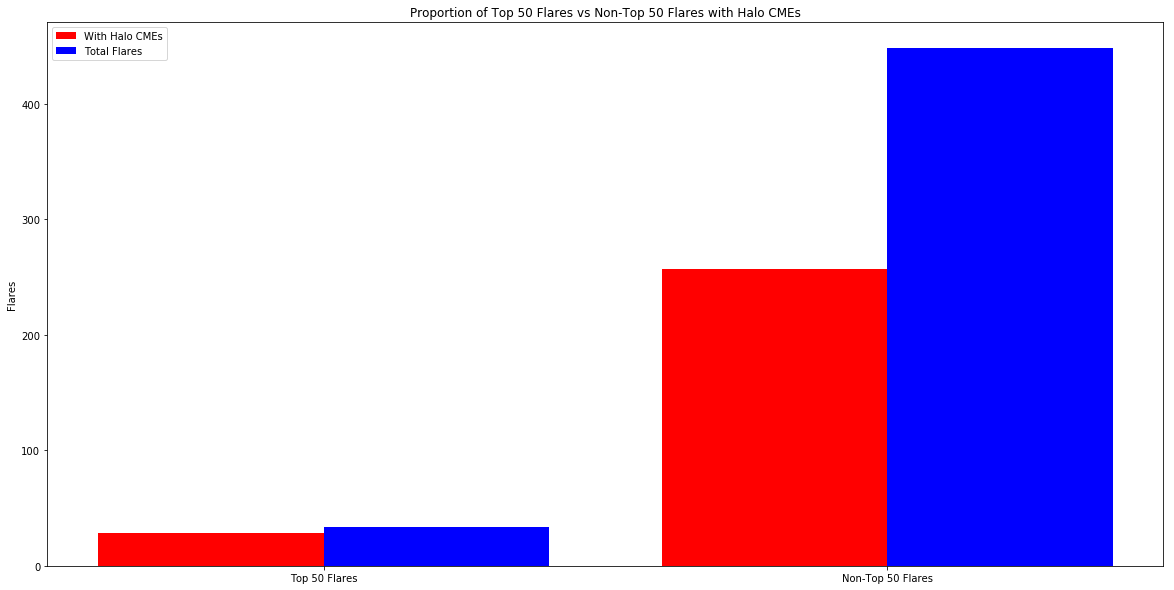

In [21]:
fig, ax = plt.subplots()
ind = np.arange(2)
width = 0.4
rowCounts = (numHalosTop50, numHalosNotTop50)
isHaloCounts = (numTop50, numNotTop50)

rects1 = ax.bar(ind, rowCounts, width, color='r')
rects2 = ax.bar(ind+width, isHaloCounts, width, color='b')

ax.set_ylabel('Flares')
ax.set_title('Proportion of Top 50 Flares vs Non-Top 50 Flares with Halo CMEs')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Top 50 Flares', 'Non-Top 50 Flares'))

ax.legend((rects1[0], rects2[0]), ('With Halo CMEs', 'Total Flares'))

plt.show()

As shown above, the proportion of Halo CMEs is much higher in major flares (shown above by Top 50 Flares) than it is in non-major (Non-Top 50) Flares. Thus, we can conclude that Halo CMEs are usually skewed to more major flares. In addition, there is going to be a stronger correlation between major flares and presence of Halo CMEs than that of non-major flares. We have a higher probability of observing a Halo CME if the flare is major.